In [1]:
import keras

2023-11-26 16:22:27.049974: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 16:22:27.233138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 16:22:27.233318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 16:22:27.258202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 16:22:27.313372: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 16:22:27.315021: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [18]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import cv2
from scipy import ndimage

from functions import read_png_files, adjust_images, scale_images, plot

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

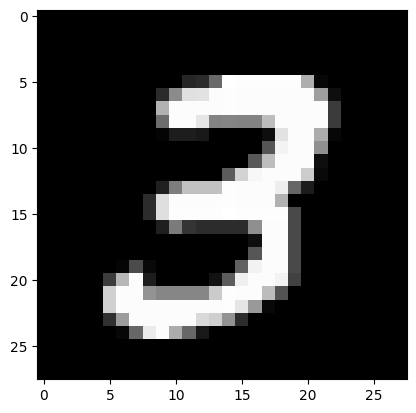

In [6]:
plt.imshow(train_images[7], cmap='grey')
train_labels[7]

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input images
model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (for each digit) and softmax activation


In [8]:
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd' or 'rmsprop'
              loss='categorical_crossentropy',  # For multi-class classification problems
              metrics=['accuracy'])


In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 [==============================] - 5s 4ms/step - loss: 0.3215 - accuracy: 0.9091 - val_loss: 0.1582 - val_accuracy: 0.9557
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1496 - accuracy: 0.9565 - val_loss: 0.1120 - val_accuracy: 0.9707
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1042 - accuracy: 0.9693 - val_loss: 0.0955 - val_accuracy: 0.9710
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0784 - accuracy: 0.9774 - val_loss: 0.0840 - val_accuracy: 0.9757
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0624 - accuracy: 0.9816 - val_loss: 0.0824 - val_accuracy: 0.9748
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0755 - val_accuracy: 0.9783
Epoch 

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9775
Test Accuracy: 97.75%


In [11]:
img = np.expand_dims(test_images[7], axis=0)
print(model.predict(img))
test_labels[7]

1/1 [==============================] - 0s 123ms/step
[[6.0791400e-10 1.7238593e-06 6.3390601e-08 1.9546829e-05 1.6502832e-05
  1.2669426e-07 5.0530181e-14 2.5013783e-06 7.3487798e-09 9.9995959e-01]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
path = r'/home/frepa/Src/nn/digits'
images = read_png_files(path)

In [17]:
images = adjust_images(images)

In [20]:
images = scale_images(images)

1/1 [==============================] - 0s 45ms/step
6


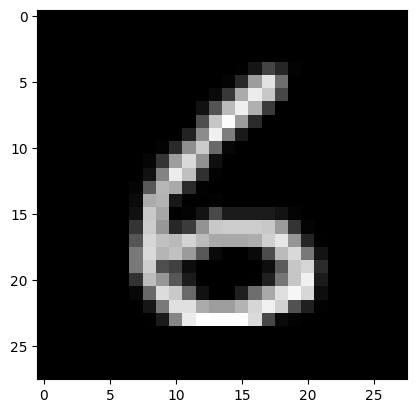

In [35]:
omg = images[9]
img = np.expand_dims(omg, axis=0)
print(np.argmax(model.predict(img)))
plot(omg)

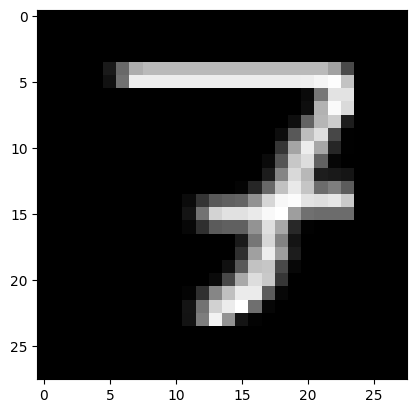

In [37]:
plot(images[6])